In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
%matplotlib inline
sns.set(style="ticks", color_codes=True)

In [2]:
df = pd.read_csv('CP_Data_P4.csv')
df= df.drop(['id','1/sbp'], axis = 1)
df['sex'] = pd.Categorical(df['sex'])
df['month'] = pd.Categorical(df['month'])
df['chdfate'] = pd.Categorical(df['chdfate'])

In [3]:
print(df.head())
print(df.dtypes)
print(df.isnull().sum())

  sex  sbp  dbp  scl chdfate  followup  age        bmi month
0   1  135   75  185       0     11688   43  20.200001    12
1   2  125   75  246       0     11688   41  22.299999     6
2   1  125   80  224       0     11688   38  20.299999     8
3   1  126   84  200       0      6555   56  27.700001    12
4   2  140   82  368       1      3515   61  29.100000    10
sex         category
sbp            int64
dbp            int64
scl            int64
chdfate     category
followup       int64
age            int64
bmi          float64
month       category
dtype: object
sex         0
sbp         0
dbp         0
scl         0
chdfate     0
followup    0
age         0
bmi         0
month       0
dtype: int64


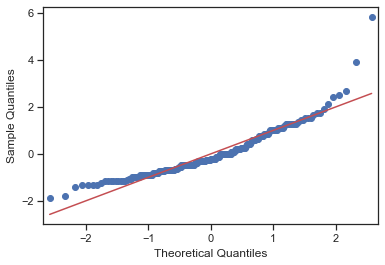

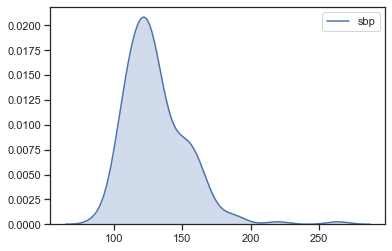

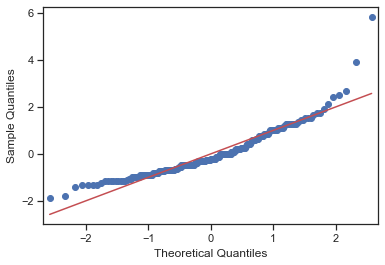

In [4]:
#Normality Checks and Box-Cox Transformation
sns.kdeplot(df['sbp'], shade = True,)
sm.qqplot(df['sbp'], line = 's', fit = True)

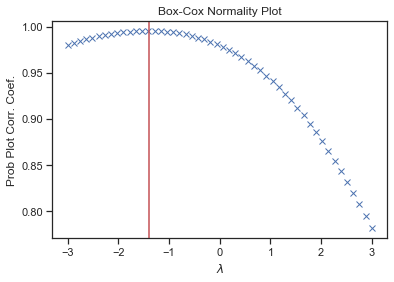

In [5]:
from scipy import stats
fig = plt.figure()
ax = fig.add_subplot(111)
stats.boxcox_normplot(df['sbp'],-3,3,plot = ax, N = 50)
_, maxlog = stats.boxcox(df['sbp'])
ax.axvline(maxlog, color='r')
plt.show()

In [6]:
from scipy.stats import boxcox
a,b,(c1,c2) = boxcox(df['sbp'], alpha = 0.05)
print('Lambda value that maximizes log-likelihood function: ', b)
print('95% confidence interval for lambda: ',(c1,c2))

Lambda value that maximizes log-likelihood function:  -1.3989153525347984
95% confidence interval for lambda:  (-2.1097285739272937, -0.715577480148888)


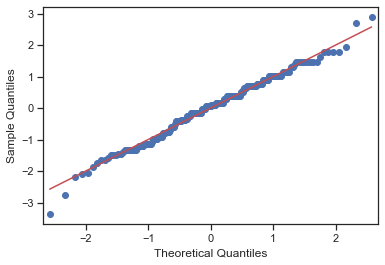

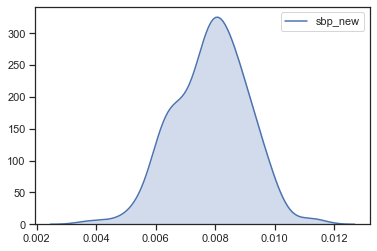

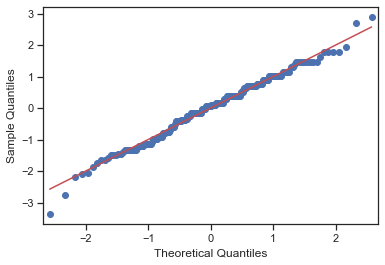

In [7]:
#Using the inverse transformation to obtain a normal distribution for the target variable
df['sbp_new'] = 1/df['sbp']
df= df.drop(['sbp'], axis = 1)
sns.kdeplot(df['sbp_new'], shade = True)
sm.qqplot(df['sbp_new'], line = 's', fit = True)

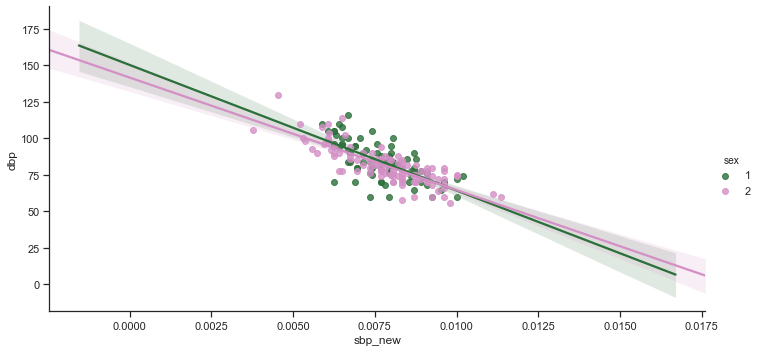

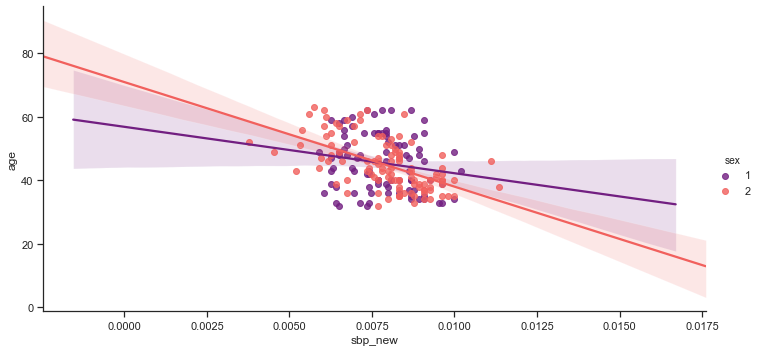

In [8]:
#Some exploratory data analysis
sns.lmplot(x = 'sbp_new', y = 'dbp', data = df,hue = 'sex',height = 5,aspect = 2, palette = 'cubehelix')
sns.lmplot(x = 'sbp_new', y = 'age', data = df,hue = 'sex',height = 5,aspect = 2, palette = 'magma')

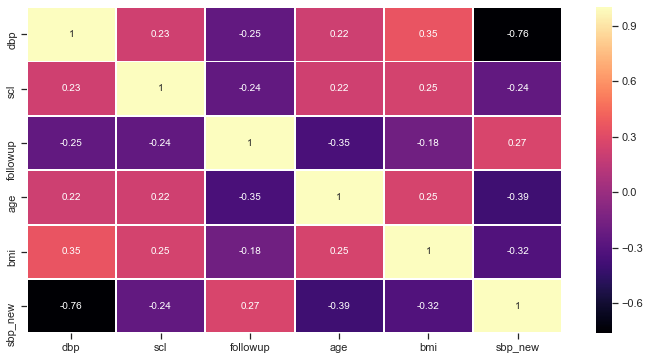

In [9]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(),cmap='magma', annot = True, linecolor = 'white', linewidth = 1)

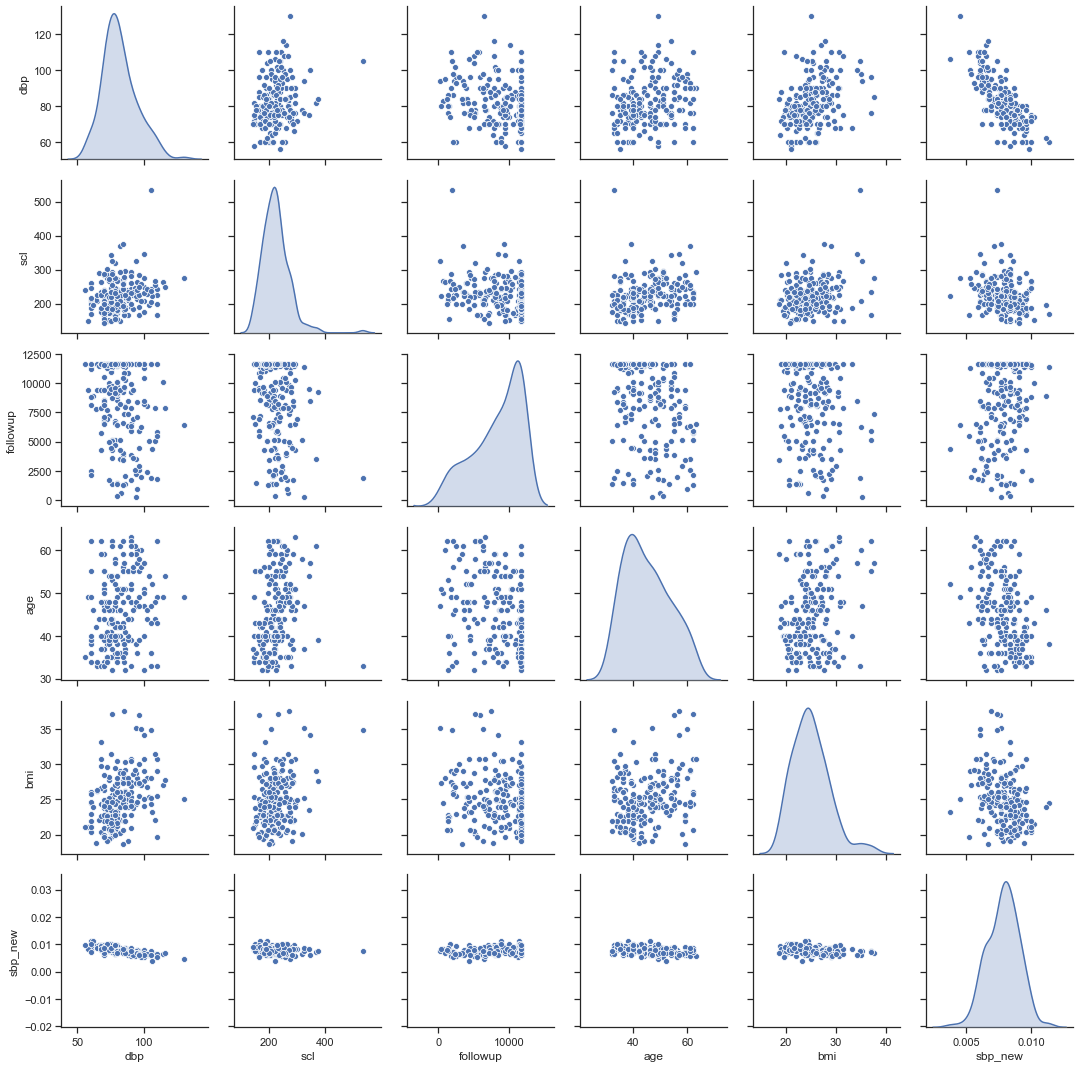

In [10]:
temp = df.drop(['sex','chdfate','month'], axis = 1)
g = sns.pairplot(data=temp,diag_kind='kde')

In [11]:
df = pd.get_dummies(df, columns = ['month','sex','chdfate'])
df = df.drop(['sex_2','chdfate_1','month_12'], axis = 1)
df['sbp_inv'] = df['sbp_new']
df = df.drop(['sbp_new'], axis = 1)
df.head()

,dbp,scl,followup,age,bmi,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,sex_1,chdfate_0,sbp_inv
0,75,185,11688,43,20.200001,0,0,0,0,0,0,0,0,0,0,0,1,1,0.007407
1,75,246,11688,41,22.299999,0,0,0,0,0,1,0,0,0,0,0,0,1,0.008000
2,80,224,11688,38,20.299999,0,0,0,0,0,0,0,1,0,0,0,1,1,0.008000
3,84,200,6555,56,27.700001,0,0,0,0,0,0,0,0,0,0,0,1,1,0.007937
4,82,368,3515,61,29.100000,0,0,0,0,0,0,0,0,0,1,0,0,0,0.007143


In [12]:
#Linear Regression with Sklearn
X = df.iloc[:,:18].values
y = df.iloc[:,18].values
LRModel = LinearRegression().fit(X,y)
print('The coefficients of predictor variables : ',LRModel.coef_)
print('The intercept : ',LRModel.intercept_)
print('The R-squared value for this model :',LRModel.score(X, y))

The coefficients of predictor variables :  [-6.85620866e-05 -6.72333630e-07 -1.32714443e-08 -3.54692871e-05
 -1.79397509e-07 -7.53925412e-05  2.74539485e-04  1.56360804e-05
  4.02430634e-04 -9.43799815e-05  4.45034761e-04  1.03297086e-03
  3.46665022e-04  3.54294271e-04  5.51211867e-04  1.89000918e-04
  9.26148995e-05  2.22356977e-04]
The intercept :  0.014924586361186258
The R-squared value for this model : 0.6775708989239924


In [13]:
#Linear Regression with statsmodels.api
X = df.iloc[:,:18].values
y = df.iloc[:,18].values
X = sm.add_constant(X)
SModel = sm.OLS(endog = y, exog = X).fit()
print(SModel.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.645
Method:                 Least Squares   F-statistic:                     21.01
Date:                Thu, 09 Jan 2020   Prob (F-statistic):           4.19e-35
Time:                        21:37:21   Log-Likelihood:                 1167.5
No. Observations:                 199   AIC:                            -2297.
Df Residuals:                     180   BIC:                            -2234.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0149      0.001     23.921      0.0

In [ ]:
#Testing with Month as an integer

In [14]:
df = pd.read_csv('CP_Data_P4.csv')
df= df.drop(['id','1/sbp'], axis = 1)
df['sex'] = pd.Categorical(df['sex'])
df['chdfate'] = pd.Categorical(df['chdfate'])
df['sbp_new'] = 1/df['sbp']
df= df.drop(['sbp'], axis = 1)
df = pd.get_dummies(df, columns = ['sex','chdfate'])
df = df.drop(['sex_2','chdfate_1'], axis = 1)
df['sbp_inv'] = df['sbp_new']
df.rename(columns = {'sex_1': 'sex','chdfate_0' : 'chdfate'}, inplace= True)
df = df.drop(['sbp_new'], axis = 1)
X = df.iloc[:,:8].values
y = df.iloc[:,8].values
X = sm.add_constant(X)
#X = StandardScaler().fit_transform(X)

In [ ]:
df.head()

In [15]:
#Linear Regression with Sklearn
LRModel = LinearRegression().fit(X,y)
print('The coefficients of predictor variables : ',LRModel.coef_)
print('The intercept : ',LRModel.intercept_)
print('The R-squared value for this model :',LRModel.score(X, y))

The coefficients of predictor variables :  [ 0.00000000e+00 -6.61066806e-05 -4.39600012e-07 -8.32829538e-09
 -3.49597970e-05  1.36604616e-06  2.23732139e-05  9.42040585e-05
  2.08898963e-04]
The intercept :  0.014673028206746732
The R-squared value for this model : 0.6489900252571286


In [16]:
#Linear Regression with statsmodels
SModel = sm.OLS(endog = y, exog = X).fit()
print(SModel.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.649
Model:                            OLS   Adj. R-squared:                  0.634
Method:                 Least Squares   F-statistic:                     43.91
Date:                Thu, 09 Jan 2020   Prob (F-statistic):           2.70e-39
Time:                        21:37:49   Log-Likelihood:                 1159.0
No. Observations:                 199   AIC:                            -2300.
Df Residuals:                     190   BIC:                            -2270.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0147      0.001     24.490      0.0

In [17]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = [variance_inflation_factor(X, i) for i in range(X.shape[1])]
print(vif)

[133.373180725396, 1.2384254369939498, 1.1947467386422346, 1.333200502787341, 1.2277914479436927, 1.2315647092674642, 1.044693931334784, 1.0241875237040727, 1.2793219207274273]


In [18]:
SModel = sm.OLS(endog = y, exog = X[:,:2]).fit()
SModel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.584
Model:                            OLS   Adj. R-squared:                  0.581
Method:                 Least Squares   F-statistic:                     276.0
Date:                Thu, 09 Jan 2020   Prob (F-statistic):           2.51e-39
Time:                        21:38:02   Log-Likelihood:                 1142.0
No. Observations:                 199   AIC:                            -2280.
Df Residuals:                     197   BIC:                            -2273.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0138      0.000     38.104      0.000       0.013       0.015
x1         -7.273e-05   4.38e-06    -16.613      0.000   -8.14e-05   -6.41e-05
==============================================================================
Omnibus:                        4.249   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.119   Jarque-Bera (JB):                3.984
Skew:                          -0.256   Prob(JB):                        0.136
Kurtosis:                       3.467   Cond. No.                         541.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
SModel = sm.OLS(endog = y, exog = X[:,[0,1,4]]).fit()
SModel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.638
Model:                            OLS   Adj. R-squared:                  0.634
Method:                 Least Squares   F-statistic:                     172.7
Date:                Thu, 09 Jan 2020   Prob (F-statistic):           5.62e-44
Time:                        21:38:03   Log-Likelihood:                 1155.9
No. Observations:                 199   AIC:                            -2306.
Df Residuals:                     196   BIC:                            -2296.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0150      0.000     37.347      0.000       0.014       0.016
x1         -6.778e-05   4.19e-06    -16.171      0.000   -7.61e-05   -5.95e-05
x2         -3.481e-05   6.41e-06     -5.433      0.000   -4.74e-05   -2.22e-05
==============================================================================
Omnibus:                        0.512   Durbin-Watson:                   2.085
Prob(Omnibus):                  0.774   Jarque-Bera (JB):                0.239
Skew:                          -0.005   Prob(JB):                        0.887
Kurtosis:                       3.169   Cond. No.                         730.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
SModel = sm.OLS(endog = y, exog = X[:,[0,1,4,7]]).fit()
SModel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.634
Method:                 Least Squares   F-statistic:                     115.1
Date:                Thu, 09 Jan 2020   Prob (F-statistic):           6.29e-43
Time:                        21:38:05   Log-Likelihood:                 1156.2
No. Observations:                 199   AIC:                            -2304.
Df Residuals:                     195   BIC:                            -2291.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0150      0.000     37.266      0.000       0.014       0.016
x1         -6.808e-05   4.21e-06    -16.155      0.000   -7.64e-05   -5.98e-05
x2         -3.487e-05   6.41e-06     -5.437      0.000   -4.75e-05   -2.22e-05
x3          7.954e-05      0.000      0.759      0.449      -0.000       0.000
==============================================================================
Omnibus:                        0.663   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.718   Jarque-Bera (JB):                0.360
Skew:                          -0.016   Prob(JB):                        0.835
Kurtosis:                       3.206   Cond. No.                         730.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
SModel = sm.OLS(endog = y, exog = X[:,[0,1,2,4,7]]).fit()
SModel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.640
Model:                            OLS   Adj. R-squared:                  0.632
Method:                 Least Squares   F-statistic:                     86.18
Date:                Thu, 09 Jan 2020   Prob (F-statistic):           5.96e-42
Time:                        21:38:06   Log-Likelihood:                 1156.4
No. Observations:                 199   AIC:                            -2303.
Df Residuals:                     194   BIC:                            -2286.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0151      0.000     35.407      0.000       0.014       0.016
x1         -6.755e-05    4.3e-06    -15.717      0.000    -7.6e-05   -5.91e-05
x2         -7.396e-07   1.14e-06     -0.649      0.517   -2.99e-06    1.51e-06
x3         -3.409e-05   6.53e-06     -5.217      0.000    -4.7e-05   -2.12e-05
x4          7.784e-05      0.000      0.741      0.459      -0.000       0.000
==============================================================================
Omnibus:                        0.565   Durbin-Watson:                   2.063
Prob(Omnibus):                  0.754   Jarque-Bera (JB):                0.284
Skew:                          -0.029   Prob(JB):                        0.868
Kurtosis:                       3.176   Cond. No.                     2.04e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.04e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [22]:
from  sklearn.feature_selection import f_regression, SelectKBest
X = df.iloc[:,:8].values
y = df.iloc[:,8].values
X_new=SelectKBest(score_func=f_regression, k=4).fit_transform(X,y)
X_new = sm.add_constant(X_new)
SModel = sm.OLS(endog = y, exog = X_new).fit()
SModel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.643
Model:                            OLS   Adj. R-squared:                  0.635
Method:                 Least Squares   F-statistic:                     87.28
Date:                Thu, 09 Jan 2020   Prob (F-statistic):           2.72e-42
Time:                        21:38:10   Log-Likelihood:                 1157.3
No. Observations:                 199   AIC:                            -2305.
Df Residuals:                     194   BIC:                            -2288.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0147      0.001     28.889      0.000       0.014       0.016
x1         -6.651e-05   4.47e-06    -14.888      0.000   -7.53e-05   -5.77e-05
x2         -3.339e-05   6.56e-06     -5.088      0.000   -4.63e-05   -2.04e-05
x3          1.611e-06   1.55e-05      0.104      0.918    -2.9e-05    3.23e-05
x4             0.0002      0.000      1.604      0.110   -4.27e-05       0.000
==============================================================================
Omnibus:                        0.714   Durbin-Watson:                   2.062
Prob(Omnibus):                  0.700   Jarque-Bera (JB):                0.408
Skew:                          -0.043   Prob(JB):                        0.815
Kurtosis:                       3.205   Cond. No.                         961.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
#Polynomial Features
from sklearn.preprocessing import PolynomialFeatures
transformer = PolynomialFeatures(degree=2, include_bias=False)
X = df.iloc[:,:8].values
y = df.iloc[:,8].values
transformer.fit(X)
X_p = transformer.transform(X)

In [24]:
X_p = sm.add_constant(X_p)
SModel = sm.OLS(endog = y, exog = X_p).fit()
SModel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.737
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     10.42
Date:                Thu, 09 Jan 2020   Prob (F-statistic):           4.56e-28
Time:                        21:38:15   Log-Likelihood:                 1187.8
No. Observations:                 199   AIC:                            -2290.
Df Residuals:                     156   BIC:                            -2148.
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0212      0.006      3.643      0.000       0.010       0.033
x1            -0.0002   6.29e-05     -2.585      0.011      -0.000   -3.84e-05
x2          3.171e-06   1.82e-05      0.174      0.862   -3.28e-05    3.92e-05
x3          9.733e-08    2.5e-07      0.389      0.698   -3.97e-07    5.92e-07
x4            -0.0002      0.000     -1.549      0.124      -0.000    4.56e-05
x5          5.126e-05      0.000      0.210      0.834      -0.000       0.001
x6          5.455e-05      0.000      0.273      0.786      -0.000       0.000
x7            -0.0016      0.001     -2.432      0.016      -0.003      -0.000
x8         -2.622e-05      0.001     -0.036      0.971      -0.001       0.001
x9         -1.655e-07   2.67e-07     -0.619      0.537   -6.93e-07    3.62e-07
x10         7.611e-09   1.54e-07      0.049      0.961   -2.97e-07    3.12e-07
x11         2.191e-09   1.83e-09      1.196      0.233   -1.43e-09    5.81e-09
x12         2.073e-06   7.03e-07      2.948      0.004    6.84e-07    3.46e-06
x13         6.954e-08   1.74e-06      0.040      0.968   -3.37e-06    3.51e-06
x14         8.799e-07   1.51e-06      0.584      0.560    -2.1e-06    3.86e-06
x15         2.334e-05   1.03e-05      2.271      0.025    3.04e-06    4.36e-05
x16        -1.568e-05   1.14e-05     -1.376      0.171   -3.82e-05    6.82e-06
x17         3.816e-09   1.87e-08      0.205      0.838    -3.3e-08    4.07e-08
x18        -5.091e-10   5.21e-10     -0.977      0.330   -1.54e-09     5.2e-10
x19        -8.212e-08   1.58e-07     -0.520      0.604   -3.94e-07     2.3e-07
x20        -6.757e-09   4.17e-07     -0.016      0.987    -8.3e-07    8.17e-07
x21         2.796e-07    4.3e-07      0.650      0.517    -5.7e-07    1.13e-06
x22        -3.292e-06   2.94e-06     -1.119      0.265    -9.1e-06    2.52e-06
x23         3.229e-06    3.4e-06      0.949      0.344   -3.49e-06    9.95e-06
x24        -4.895e-12   6.29e-12     -0.778      0.438   -1.73e-11    7.53e-12
x25          3.43e-09   2.58e-09      1.328      0.186   -1.67e-09    8.53e-09
x26        -6.298e-09   6.53e-09     -0.964      0.336   -1.92e-08     6.6e-09
x27        -8.788e-09   5.62e-09     -1.564      0.120   -1.99e-08    2.31e-09
x28        -4.723e-08   3.99e-08     -1.185      0.238   -1.26e-07    3.15e-08
x29         -4.48e-08   4.94e-08     -0.906      0.366   -1.42e-07    5.29e-08
x30        -7.609e-07   9.68e-07     -0.786      0.433   -2.67e-06    1.15e-06
x31         2.159e-07   2.44e-06      0.088      0.930    -4.6e-06    5.04e-06
x32        -1.396e-07    2.2e-06     -0.063      0.950   -4.49e-06    4.21e-06
x33         2.981e-05   1.57e-05      1.902      0.059   -1.14e-06    6.08e-05
x34          4.73e-06   1.86e-05      0.254      0.800    -3.2e-05    4.15e-05
x35        -7.149e-07   3.32e-06     -0.216      0.830   -7.27e-06    5.84e-06
x3

In [25]:
df['dscl'] = df['dbp']*df['scl']
df['dfol'] = df['dbp']*df['followup']
df['dage'] = df['dbp']*df['age']
df['dbmi'] = df['dbp']*df['bmi']
df['dmon'] = df['dbp']*df['month']
df['sbpinv'] = df['sbp_inv']
df = df.drop(['sbp_inv'], axis = 1)

In [26]:
df.head()

,dbp,scl,followup,age,bmi,month,sex,chdfate,dscl,dfol,dage,dbmi,dmon,sbpinv
0,75,185,11688,43,20.200001,12,1,1,13875,876600,3225,1515.000057,900,0.007407
1,75,246,11688,41,22.299999,6,0,1,18450,876600,3075,1672.499943,450,0.008000
2,80,224,11688,38,20.299999,8,1,1,17920,935040,3040,1623.999939,640,0.008000
3,84,200,6555,56,27.700001,12,1,1,16800,550620,4704,2326.800064,1008,0.007937
4,82,368,3515,61,29.100000,10,0,0,30176,288230,5002,2386.200031,820,0.007143


In [27]:
X = df.iloc[:,:13].values
y = df.iloc[:,13].values
X_p = sm.add_constant(X)
SModel = sm.OLS(endog = y, exog = X_p).fit()
print(SModel.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.667
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     28.50
Date:                Thu, 09 Jan 2020   Prob (F-statistic):           2.04e-37
Time:                        21:38:25   Log-Likelihood:                 1164.2
No. Observations:                 199   AIC:                            -2300.
Df Residuals:                     185   BIC:                            -2254.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0254      0.004      6.752      0.0

In [28]:
X = df.iloc[:,:13].values
y = df.iloc[:,13].values
X_new=SelectKBest(score_func=f_regression, k=6).fit_transform(X,y)
X_new = sm.add_constant(X_new)
SModel = sm.OLS(endog = y, exog = X_new).fit()
SModel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.650
Model:                            OLS   Adj. R-squared:                  0.640
Method:                 Least Squares   F-statistic:                     59.56
Date:                Thu, 09 Jan 2020   Prob (F-statistic):           3.02e-41
Time:                        21:38:27   Log-Likelihood:                 1159.4
No. Observations:                 199   AIC:                            -2305.
Df Residuals:                     192   BIC:                            -2282.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0224      0.003      7.609      0.000       0.017       0.028
x1            -0.0002   3.54e-05     -4.411      0.000      -0.000   -8.63e-05
x2            -0.0001   4.36e-05     -2.317      0.022      -0.000    -1.5e-05
x3            -0.0002      0.000     -1.662      0.098      -0.000    3.27e-05
x4         -8.559e-09   1.39e-08     -0.615      0.539    -3.6e-08    1.89e-08
x5          8.165e-07   5.24e-07      1.558      0.121   -2.17e-07    1.85e-06
x6          2.087e-06   1.26e-06      1.660      0.099   -3.93e-07    4.57e-06
==============================================================================
Omnibus:                        0.456   Durbin-Watson:                   2.031
Prob(Omnibus):                  0.796   Jarque-Bera (JB):                0.208
Skew:                          -0.035   Prob(JB):                        0.901
Kurtosis:                       3.142   Cond. No.                     1.14e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.14e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [29]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = [variance_inflation_factor(X, i) for i in range(X.shape[1])]
print(vif)

[119.5701304954847, 1040.0984770623188, 345.2156227599199, 1364.2921099913892, 2137.9460308619127, 184.91399723310644, 1.9676207575150173, 3.9997245553197294, 1019.4198452488434, 316.57912982556365, 1356.5692325679322, 2250.3059371557556, 185.03649027128873]


In [30]:
#One Variable
SModel = sm.OLS(endog = y, exog = X[:,:2]).fit()
#print(SModel.summary())

In [31]:
#Two Variables
SModel2 = sm.OLS(endog = y, exog = X[:,[0,1,4]]).fit()
#print(SModel2.summary())
anova_tab = sm.stats.anova_lm(SModel,SModel2)
anova_tab

D:\Anaconda\Installation\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
D:\Anaconda\Installation\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
D:\Anaconda\Installation\lib\site-packages\scipy\stats\_distn_infrastructure.py:1831: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,197.0,0.000853,0.0,NaN,NaN,NaN
1,196.0,0.000679,1.0,0.000173,50.023975,2.619721e-11


In [32]:
SModel3 = sm.OLS(endog = y, exog = X[:,[0,1,4,8]]).fit()
print(SModel3.summary())
anova_tab = sm.stats.anova_lm(SModel2,SModel3)
anova_tab

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.985
Model:                            OLS   Adj. R-squared (uncentered):              0.985
Method:                 Least Squares   F-statistic:                              3297.
Date:                Thu, 09 Jan 2020   Prob (F-statistic):                   8.56e-178
Time:                        21:43:51   Log-Likelihood:                          1100.3
No. Observations:                 199   AIC:                                     -2193.
Df Residuals:                     195   BIC:                                     -2179.
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,196.0,0.000679,0.0,NaN,NaN,NaN
1,195.0,0.000184,1.0,0.000496,526.464866,2.669132e-57


In [33]:
SModel4 = sm.OLS(endog = y, exog = X[:,[0,1,4,8,6]]).fit()
#SModel4.summary()
#4 Variable Model
anova_tab = sm.stats.anova_lm(SModel3,SModel4)
anova_tab

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,195.0,0.000184,0.0,NaN,NaN,NaN
1,194.0,0.000183,1.0,3.622525e-07,0.38356,0.536431


In [34]:
SModel5 = sm.OLS(endog = y, exog = X[:,[0,1,4,8,6,7]]).fit()
#SModel5.summary()
#5 Variable Model
anova_tab = sm.stats.anova_lm(SModel4,SModel5)
anova_tab

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,194.0,0.000183,0.0,NaN,NaN,NaN
1,193.0,0.000175,1.0,0.000008,9.2752,0.002647


In [35]:
Final_Model = sm.OLS(endog = y, exog = X[:,[0,1,4,8,6]]).fit()
print(Final_Model.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.985
Model:                            OLS   Adj. R-squared (uncentered):              0.985
Method:                 Least Squares   F-statistic:                              2629.
Date:                Thu, 09 Jan 2020   Prob (F-statistic):                   4.32e-176
Time:                        21:44:30   Log-Likelihood:                          1100.5
No. Observations:                 199   AIC:                                     -2191.
Df Residuals:                     194   BIC:                                     -2175.
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

Text(0.5, 1.0, 'Distribution of Residuals')

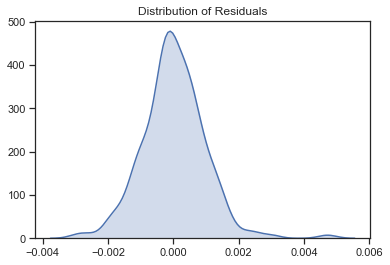

In [36]:
sns.kdeplot(Final_Model.resid, shade = True, ).set_title('Distribution of Residuals')

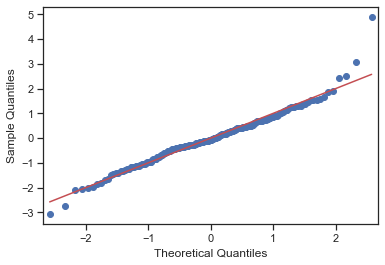

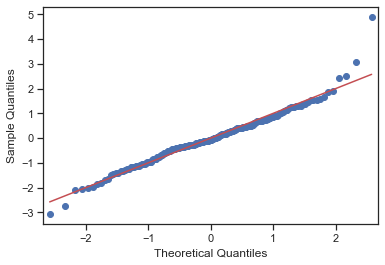

In [37]:
sm.qqplot(Final_Model.resid, line = 's', fit = True)

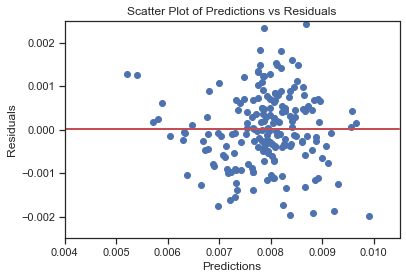

In [38]:
plt.scatter(Final_Model.predict(X[:,[0,1,4,8,6]]), Final_Model.resid)
plt.title('Scatter Plot of Predictions vs Residuals')
plt.ylabel('Residuals')
plt.xlabel('Predictions')
plt.xlim(0.004,0.0105)
plt.ylim(-0.0025,0.0025)
plt.plot([0.004, 0.0105], [np.mean(Final_Model.resid),np.mean(Final_Model.resid)], 'r-', lw=2)

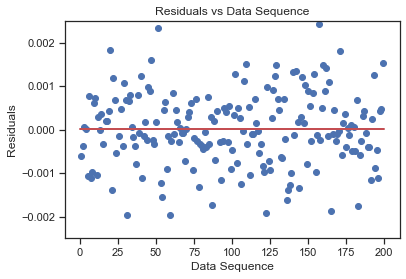

In [39]:
plt.scatter(x = np.arange(X.shape[0]) + 1, y = Final_Model.resid)
plt.title('Residuals vs Data Sequence')
plt.ylabel('Residuals')
plt.xlabel('Data Sequence')
plt.ylim(-0.0025,0.0025)
plt.plot([0,200], [np.mean(Final_Model.resid),np.mean(Final_Model.resid)], 'r-', lw=2)